In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [4]:
df = pd.read_csv('UN.csv')

In [5]:
df.head()

,country,region,tfr,contraception,educationMale,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
0,Afghanistan,Asia,6.90,NaN,NaN,NaN,45.0,46.0,154,2848,87.5,7.2,52.800,85.00
1,Albania,Europe,2.60,NaN,NaN,NaN,68.0,74.0,32,863,NaN,NaN,NaN,NaN
2,Algeria,Africa,3.81,52,11.1,9.9,67.5,70.3,44,1531,76.4,7.8,26.100,51.00
3,American.Samoa,Asia,NaN,NaN,NaN,NaN,68.0,73.0,11,NaN,58.8,42.4,0.264,0.36
4,Andorra,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
rows = df.shape[0]
print('total rows {}'.format(rows))

total rows 207


In [7]:
rows - df.isnull().sum()

country                   207
region                    207
tfr                       197
contraception             144
educationMale              76
educationFemale            76
lifeMale                  196
lifeFemale                196
infantMortality           201
GDPperCapita              197
economicActivityMale      165
economicActivityFemale    165
illiteracyMale            160
illiteracyFemale          160
dtype: int64

In [8]:
# best to cluster on infantmortality, lifeMale, lifeFemale

In [9]:
for col in df.columns.values:
    print('{} : {}'.format(col, df[col].dtype))

country : object
region : object
tfr : float64
contraception : float64
educationMale : float64
educationFemale : float64
lifeMale : float64
lifeFemale : float64
infantMortality : float64
GDPperCapita : float64
economicActivityMale : float64
economicActivityFemale : float64
illiteracyMale : float64
illiteracyFemale : float64


In [10]:
len(df['country'].unique()) # unique returns list.  len gives length. Prevents counting duplicates.

207

In [11]:
#Apply scipy.cluster.vq.kmeans 1 to 10 and determine the cluster centroids.


In [114]:
from scipy.cluster.vq import kmeans, whiten, vq

In [13]:
features = ['lifeMale','lifeFemale','infantMortality','GDPperCapita']

In [45]:
df_features = df[features]

In [46]:
df_features.head()

,lifeMale,lifeFemale,infantMortality,GDPperCapita
0,45.0,46.0,154,2848
1,68.0,74.0,32,863
2,67.5,70.3,44,1531
3,68.0,73.0,11,NaN
4,NaN,NaN,NaN,NaN


In [47]:
df_features_clean = df_features.dropna() 

In [48]:
df_features_clean.shape

(188, 4)

In [52]:
ar_whiten = whiten(df_features_clean)
# whiten function normalizes the df

In [53]:
ar_centroids = kmeans(ar_whiten , 10) # this generates the codebook with whitened centroid values

In [56]:
ar_centroids

(array([[ 4.73891584,  4.46290713,  2.83381706,  0.03232314],
        [ 7.57162724,  7.17220628,  0.22647459,  2.043228  ],
        [ 5.92734851,  5.45905091,  1.87721552,  0.1585886 ],
        [ 4.3559465 ,  4.06808367,  3.66364083,  0.07454862],
        [ 6.7418259 ,  6.61355682,  0.56452935,  0.29259488],
        [ 7.35584461,  7.09031481,  0.27066476,  1.15659281],
        [ 6.63764845,  6.28846415,  1.14502418,  0.16406281],
        [ 5.21459989,  4.89798179,  2.0980099 ,  0.09440701],
        [ 7.61548268,  7.29104312,  0.14779155,  3.38829266],
        [ 7.20375448,  6.85702375,  0.4618486 ,  0.30190503]]),
 0.38931660538177959)

In [121]:
centroid_vectors = vq(ar_whiten,ar_centroids[0])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A24E160>]], dtype=object)

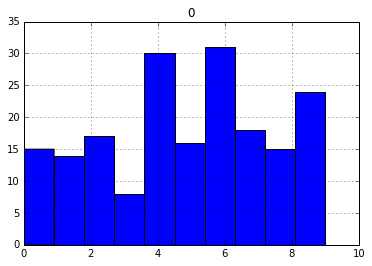

In [124]:
pd.DataFrame(centroid_vectors[0]).hist()

In [58]:
df_features_clean.head()

,lifeMale,lifeFemale,infantMortality,GDPperCapita
0,45.0,46.0,154,2848
1,68.0,74.0,32,863
2,67.5,70.3,44,1531
5,44.9,48.1,124,355
7,69.6,76.8,22,8055


In [59]:
ar_features_clean = np.array(df_features_clean)

In [24]:
# must need to whiten the df too - comparing whitened centroids to non-whitened df doesn't make seense.

In [95]:
ar_features_clean[0]

array([   45.,    46.,   154.,  2848.])

In [96]:
ar_centroids[0]

array([[ 4.73891584,  4.46290713,  2.83381706,  0.03232314],
       [ 7.57162724,  7.17220628,  0.22647459,  2.043228  ],
       [ 5.92734851,  5.45905091,  1.87721552,  0.1585886 ],
       [ 4.3559465 ,  4.06808367,  3.66364083,  0.07454862],
       [ 6.7418259 ,  6.61355682,  0.56452935,  0.29259488],
       [ 7.35584461,  7.09031481,  0.27066476,  1.15659281],
       [ 6.63764845,  6.28846415,  1.14502418,  0.16406281],
       [ 5.21459989,  4.89798179,  2.0980099 ,  0.09440701],
       [ 7.61548268,  7.29104312,  0.14779155,  3.38829266],
       [ 7.20375448,  6.85702375,  0.4618486 ,  0.30190503]])

In [93]:
cast1 = ar_features_clean[0] - ar_centroids[0]

In [99]:
45 - 4.73, 46 - 4.46 , 45 - 7.51

(40.269999999999996, 41.54, 37.49)

In [94]:
cast1 # casting will subtract a data row from all values in the centroid

array([[   40.26108416,    41.53709287,   151.16618294,  2847.96767686],
       [   37.42837276,    38.82779372,   153.77352541,  2845.956772  ],
       [   39.07265149,    40.54094909,   152.12278448,  2847.8414114 ],
       [   40.6440535 ,    41.93191633,   150.33635917,  2847.92545138],
       [   38.2581741 ,    39.38644318,   153.43547065,  2847.70740512],
       [   37.64415539,    38.90968519,   153.72933524,  2846.84340719],
       [   38.36235155,    39.71153585,   152.85497582,  2847.83593719],
       [   39.78540011,    41.10201821,   151.9019901 ,  2847.90559299],
       [   37.38451732,    38.70895688,   153.85220845,  2844.61170734],
       [   37.79624552,    39.14297625,   153.5381514 ,  2847.69809497]])

In [106]:
# minidx = min(enumerate(data), key=lambda x:sum(x[1]))[0]
test1 = min(enumerate(cast1), key = lambda x: sum(x[1]))[0]  # this lambda function will find the 
# row with the min difference

test1

8

In [100]:
cast1 = ar_features_clean - ar_centroids[0]

ValueError: operands could not be broadcast together with shapes (188,4) (10,4) 